# Maximum-likelihood estimate for mean lifetime in radiactive decay

Solve the tasks below.
For each task, give reasons for your solution by commenting in the notebook.
In conclusion, summarize your findings and contextualize them. What have you learned? Do the results make sense?

Your results will be examined for plagiarism. Please use your own plot styles, articulate your own thoughts, and present your own experimental approaches.

## Tasks

a) The maximum likelihood estimator for the mean lifetime $\tau$ of a radioactive decay desribed by the distribution

$$ f(t, \tau) = \frac{1}{\tau} e^{-t/\tau}$$

is give by 

$$\hat \tau = \frac{1}{n} \sum_{i=1}^n t_i.$$

The standard deviation of $\hat \tau$ can be estimated as 

$$\sigma_\tau^2 = - \left(\frac{\partial^2 \ln L(\tau)}{\partial^2 \tau} \Big|_{\tau = \hat \tau} \right)^{-1}$$

Use that to show that the uncertainty of $\hat \tau$ is given by $\sigma_\tau = \frac{\hat \tau}{\sqrt{n}}$

b) Use the function *generate_data* defined below to generate a data set with 30 and 300 samples for $\tau = 2$, respectively. Plot the log-likelihood function $\ln L(\tau)$ along with the parabolic approximation. 

$$ \ln L(\tau) \approx \ln L_\mathrm{max} - \frac{(\tau - \hat \tau)^2}{2 \sigma^2}$$

What can you conclude about the validity of the approximtion as the sample size increases?

c) Generate 1000 data sets each with 500 samples for $\tau = 2$ and determine for each data set whether the true value of tau lies in the interval $[\hat \tau - \sigma_{\hat \tau}, \hat \tau + \sigma_{\hat \tau}]$. How often does the true value lie in this interval? What is your expection for the correspinding probability?


### Hints

It is recommended to not start coding right away. Try to really understand how the Likelihood looks first. Realize, what the Likelihood is a function of and what it describes.


# Task 1

In [54]:
import sympy as sp
from IPython.display import display, Math

# Symbols
tau, N = sp.symbols('tau N', positive=True, real=True)
i = sp.symbols('i', integer=True)
t = sp.IndexedBase('t')

# this is then our pdf for any individual measurment
pdf = tau**(-1)*sp.exp(-t[i]/tau)

print("pdf for individual measurment:")
display(Math(rf"f(t_{{i}}, \tau) = {sp.latex(pdf)}"))

print("we'll take the log of the product of the pdfs for the likehood so might as well \n already work in terms for easier handling")
# Term inside the log likelihood sum for each measurement
term = -sp.log(tau) - t[i]/tau
display(Math(rf"\text{{Log likelihood term: }} \ell_i(\tau) = {sp.latex(term)}"))
print("note: sympy define 'log' as the natural logarithm")


# Sum over i=1 to N
logL = sp.Sum(term, (i, 1, N))
display(Math(rf"\ln L(\tau) = {sp.latex(logL)}"))




# Second derivative of term w.r.t. tau
d2_term = sp.diff(term, tau, 2)
display(Math(rf"\frac{{\partial^2 \ell_i}}{{\partial \tau^2}} = {sp.latex(d2_term)}"))

# Sum of second derivatives
d2_logL = sp.Sum(d2_term, (i, 1, N)).doit()
display(Math(r"\frac{\partial^2 \ln L}{\partial \tau^2} = " + sp.latex(d2_logL)))

# MLE estimator: sample mean (symbolic)
tau_hat = (1/N)*sp.Sum(t[i], (i, 1, N)).doit()
display(Math(r"\hat{\tau} = " + sp.latex(tau_hat)))

# Evaluate second derivative at tau = tau_hat
d2_logL_at_tau_hat = d2_logL.subs(tau, tau_hat)
display(Math(rf"\left. \frac{{\partial^2 \ln L}}{{\partial \tau^2}} \right|_{{\tau = \hat{{\tau}}}} = {sp.latex(d2_logL_at_tau_hat)}"))

# Variance estimate: negative inverse of second derivative at tau_hat
sigma2_tau = -1/d2_logL_at_tau_hat
sigma_tau = sp.sqrt(sigma2_tau)
display(Math(r"\sigma_\tau = " + sp.latex(sigma_tau.simplify())))

print("idk why the square root doesnt get simplified away – \n but a human sees the we can deconstruct the expression to")
display(Math(r"\sigma_\tau =\frac{\hat{{\tau}}}{\sqrt{N}} "))

pdf for individual measurment:


<IPython.core.display.Math object>

we'll take the log of the product of the pdfs for the likehood so might as well 
 already work in terms for easier handling


<IPython.core.display.Math object>

note: sympy define 'log' as the natural logarithm


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

idk why the square root doesnt get simplified away – 
 but a human sees the we can deconstruct the expression to


<IPython.core.display.Math object>

# Task 2
$$ \ln L(\tau) \approx \ln L_\mathrm{max} - \frac{(\tau - \hat \tau)^2}{2 \sigma^2}$$

What can you conclude about the validity of the approximtion as the sample size increases?

Text(0.5, 0, '$\\tau$')

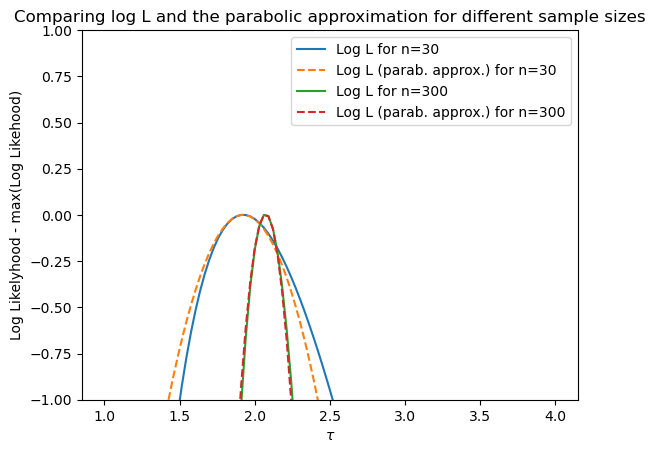

In [69]:
import numpy as np
import matplotlib.pyplot as plt
def generate_data(tau, n_samples):
    return np.random.exponential(tau, n_samples)

#set params
tau_real = 2
n_samples_list = [30,300]

#loop over sample sizes
for n_samples in n_samples_list:
    # generate data
    data = generate_data(tau_real,n_samples)

    # log likelyhood will takes the form (from above):
    # ln L(tau)= sum_over_i(-ln(tau) - t_i/tau)
    # which is a function over tau, so we start with defining a tau linspace 
    # and numerically evaluating the function afterwards

    tau_space = np.linspace(1,4,100) #we know its 2 so choose range appropriately
    logL = np.array([np.sum(-np.log(tau) - data/tau) for tau in tau_space]) #this is admitedly a very condensed version but thats fun

    
    # now do the parabolic approximation
    # i'm assuming L_max is just the regular L evaluated at tau_hat

    # first calculate tau_hat from an array of samples, which is just the sample mean of the data lol
    # and we know the form for the uncertainty
    tau_hat = data.mean()
    sigma_tau_hat = tau_hat/np.sqrt(data.shape[0])

    # now evaluate the parabolic approx in same tau_range as before
    logL_parab = np.array([np.sum(-np.log(tau_hat) - data/tau_hat) - ((tau - tau_hat)**2)/(2*sigma_tau_hat**2) for tau in tau_space])

    # now plot

    plt.plot(tau_space, logL - logL.max(), label=f"Log L for n={n_samples}")
    plt.plot(tau_space, logL_parab - logL_parab.max(), label=f"Log L (parab. approx.) for n={n_samples}",ls="dashed")

plt.legend(); plt.ylim(-1,1); plt.title("Comparing log L and the parabolic approximation for different sample sizes")

plt.ylabel("Log Likelyhood - max(Log Likehood)")
plt.xlabel(r"$\tau$")

In order to be able to compare the curves for both sample sizes in the same plot the maxima are set to 0. This doesnt change the form of the curves but just shifts them. Then the y-limits are chosen such that we can clearly see whats going on.

We can indeed, at least visually, confirm that the parabolic approximation is more accurate for higher sample sizes.

# Task 3
c) Generate 1000 data sets each with 500 samples for $\tau = 2$ and determine for each data set whether the true value of tau lies in the interval $[\hat \tau - \sigma_{\hat \tau}, \hat \tau + \sigma_{\hat \tau}]$. How often does the true value lie in this interval? What is your expection for the correspinding probability?

In [113]:
#set params
n_data_sets = 1000
n_samples = 500
tau_real

#its generatin time, first set a counter tho for how often it works
counter = 0

for i in range(n_data_sets):
    data = generate_data(tau_real,n_samples)

    # calculate tau hat and sigma
    tau_hat = data.mean()
    sigma_tau_hat = tau_hat/np.sqrt(data.shape[0])
    if np.allclose(tau_hat,tau_real,atol=sigma_tau_hat):
        counter += 1

print(fr"In {counter} out of {n_data_sets} instances tau was in the range (tau_hat - sigma_tau_hat, tau_hat + sigma_tau_hat)  ")

In 686 out of 1000 instances tau was in the range (tau_hat - sigma_tau_hat, tau_hat + sigma_tau_hat)  


This is a typical one-sigma confidence interval – we expect a 68% probability of the estimated parameter to be within 1-sigma of the true parameter.